# k-nearest neighbors

# Q1. k-nearest neightbors を用いたクラス分類について調べ、<br>そのアルゴリズムについて説明せよ。

# A1. 

## k-nearest neightborsとは

- n次元空間に存在するデータを使い新しいデータにラベル名をつける教師あり学習である。  
- n次元空間に存在するデータはラベル(データ名)と位置情報を元に領域が分かれている。  
- n次元空間に新しくラベルを持たないデータを入れた時、  
  新しいデータから最も近いk個のデータを見つけ、多数決により新しいデータのラベル名を決める。  
  
以上が、  
k-nearest neightborsを用いたクラス分類である。  

引用：https://ja.wikipedia.org/wiki/K%E8%BF%91%E5%82%8D%E6%B3%95

<img src="images/k-nn.png">


# k-nearest neightborsのアルゴリズムについて

k-nearest neightborsを解く為に必要な手順は以下。    
**1. 新しく入るデータと既存データとの距離の測り方**  
**2. 新しいデータが所属するグループを決める方法**  
**3. k個のデータ数を決める方法**  

1,2,3を解決することでk-nearest neightborsの問題を解くことができる。

## 1. 新しく入るデータと既存データとの距離の測り方

距離の測り方の一つにユーグリット距離がある。  
**ユーグリット距離とは**次元空間において二点間を最短距離で線形に測る方法。  
以下の図にある様に**二次元**の場合の距離の測り方は  
<img src="images/euclidean_1.png">

n次元になると以下の様にして求めることができる。
<img src="images/euclidean_2.png">

<img src="images/euclidean.png">

引用：https://ja.wikipedia.org/wiki/%E3%83%A6%E3%83%BC%E3%82%AF%E3%83%AA%E3%83%83%E3%83%89%E8%B7%9D%E9%9B%A2

## 2. 新しいデータが付けるラベルを決める方法

- 新しいデータ点を入れた場所からユーグリット距離を測る。  
- 新しいデータ点から最も近いk個のデータが持つラベルの最も多いグループのラベル名を付ける。  
この時、k個の個数だけに依存しており、選ばれたk個それぞれが新しいデータ点からの距離には意味を持たない。

## 3. k個のデータ数を決める方法

- k個の数を決める方法は既存データの数に依存する。  
- 指定する方法のひとつに、既存データ数の平方根をとり求めた数を使う。  
- 何パターンかkの個数を変えて学習させ、検証結果の精度で判断する。  

# Q2. 上述のアルゴリズムを Numpy を用いて実装し、Iris データに適用せよ。

# A2. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

In [2]:
iris.target  # irisデータセットのラベルを確認

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.feature_names  # irisデータセットに記載されているデータの名前

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# irisデータをdataframeへ(カラム名はデータセットについている花弁とガクの長さと幅)
df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)
df["label"] = iris.target  # irisデータセットにあるラベルを列を追加

In [5]:
df = df.sample(frac=1).reset_index(drop=True)  # irisデータをシャッフルし、インデックスを0から順に直す

In [6]:
df.head()  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.6,3.6,1.0,0.2,0
1,4.8,3.1,1.6,0.2,0
2,6.0,2.9,4.5,1.5,1
3,5.0,3.5,1.3,0.3,0
4,7.0,3.2,4.7,1.4,1


In [7]:
df.shape

(150, 5)

In [8]:
dist = scipy.spatial.distance.pdist(df, metric='euclidean')

In [9]:
150*149/2

11175.0

In [10]:
len(scipy.spatial.distance.pdist(df, metric='euclidean'))

11175

In [11]:
"""全データがそれぞれのデータ対しての距離を出す(150 x 150 種類)"""
square_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(df, metric='euclidean'))  # 正方行列取得(対角成分も含まれる)
square_matrix[0]

array([0.        , 0.80622577, 4.17013189, 0.51961524, 4.69574275,
       0.80622577, 0.98488578, 7.33689308, 4.03732585, 1.12249722,
       0.83066239, 7.06965346, 0.73484692, 5.91692488, 0.93808315,
       5.26592822, 3.23419233, 1.06770783, 5.3712196 , 5.7497826 ,
       0.74161985, 4.1484937 , 4.34396133, 5.19519008, 5.55157635,
       4.01870626, 0.9591663 , 4.82907859, 5.84807661, 0.64807407,
       3.52562051, 0.74833148, 6.18304132, 4.9010203 , 6.10491605,
       1.46287388, 4.84148737, 6.51383144, 5.5767374 , 4.44971909,
       4.28252262, 4.45533388, 4.43057558, 5.06063237, 0.75498344,
       5.71401785, 0.77459667, 6.66258208, 4.72863617, 5.73846669,
       3.67423461, 5.51089829, 0.56568542, 4.4609416 , 5.98999165,
       5.04678115, 3.70270172, 1.34164079, 3.75499667, 2.90860791,
       0.9486833 , 5.99583189, 4.90815648, 1.28062485, 3.46698716,
       2.96310648, 0.6       , 4.31972221, 5.09411425, 0.74161985,
       5.04182507, 4.43395986, 5.74804315, 0.77459667, 0.56568

In [12]:
for i in range(150):
    label = 'distance_%s' % i
    df[label] = square_matrix[i]

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,distance_0,distance_1,distance_2,distance_3,distance_4,...,distance_140,distance_141,distance_142,distance_143,distance_144,distance_145,distance_146,distance_147,distance_148,distance_149
0,4.6,3.6,1.0,0.2,0,0.000000,0.806226,4.170132,0.519615,4.695743,...,0.685565,4.937611,5.546170,6.203225,0.458258,5.424942,0.781025,0.943398,6.485368,0.768115
1,4.8,3.1,1.6,0.2,0,0.806226,0.000000,3.546830,0.547723,4.110961,...,0.721110,4.376071,5.006995,5.629387,0.424264,4.827007,0.244949,0.424264,5.962382,0.141421
2,6.0,2.9,4.5,1.5,1,4.170132,3.546830,0.000000,3.746999,1.067708,...,4.173727,1.126943,1.688194,2.206808,3.776242,1.414214,3.676955,3.337664,2.547548,3.597221
3,5.0,3.5,1.3,0.3,0,0.519615,0.547723,3.746999,0.000000,4.226109,...,0.905539,4.546427,5.119570,5.768015,0.424264,5.015974,0.529150,0.648074,6.060528,0.469042
4,7.0,3.2,4.7,1.4,1,4.695743,4.110961,1.067708,4.226109,0.000000,...,4.793746,1.431782,1.410674,1.700000,4.347413,1.489966,4.216634,3.893584,2.090454,4.135215


In [14]:
label_dict = {}
for j in range(150):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = df.sort_values(by=sort_label)[1:6]['label']

In [15]:
label_dict['distance_1']  # 自分自身を除く一番近いラベル5個をそれぞれ取得 , 例として'distance_1'を表示

94     0
149    0
73     0
98     0
14     0
Name: label, dtype: int64

In [16]:
from collections import Counter

In [17]:
list(Counter(label_dict['distance_1']))[0]

0

In [18]:
prediction_result = {}
for v in range(150):
    predict_label = 'distance_%s' % v
    prediction_result[v] = list(Counter(label_dict[predict_label]))[0]

In [19]:
df["pred_label"] = prediction_result.values()  # 予測値をdfにラベルを付けて含める

In [20]:
comparison_value = 0
for pred, correct in zip(prediction_result.values(), df['label']):
    comparison_value+= abs(pred - correct)
comparison_value   # 比較した結果　間違いはなし！？

0

In [21]:
pd.set_option('display.max_rows', 150)  # 行を0~149まで全て表示

In [22]:
df.loc[:,['label','pred_label']]  # 'label'=正解ラベル、 'pred_label'=予測ラベル　

# 全て一致している。

,label,pred_label
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,2,2
8,1,1
9,0,0


In [23]:
df_correct_answer_0 = df.groupby('label').get_group(0)
df_correct_answer_1 = df.groupby('label').get_group(1)
df_correct_answer_2 = df.groupby('label').get_group(2)

df_prediction_0 = df.groupby('pred_label').get_group(0)
df_prediction_1 = df.groupby('pred_label').get_group(1)
df_prediction_2 = df.groupby('pred_label').get_group(2)

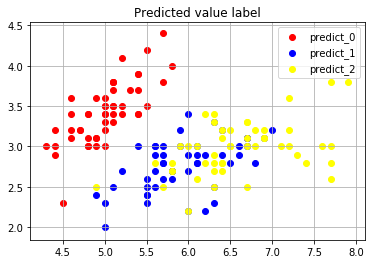

In [24]:
# x = np.random.rand(100)
# y = np.random.rand(100)
# x = df["sepal length (cm)"]
# y = df["sepal width (cm)"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Predicted value label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_prediction_0["sepal length (cm)"], df_prediction_0["sepal width (cm)"], c='red', label='predict_0')
ax.scatter(df_prediction_1["sepal length (cm)"], df_prediction_1["sepal width (cm)"], c='blue', label='predict_1')
ax.scatter(df_prediction_2["sepal length (cm)"], df_prediction_2["sepal width (cm)"], c='yellow', label='predict_2')

ax.grid(True)
ax.legend(loc='upper right')

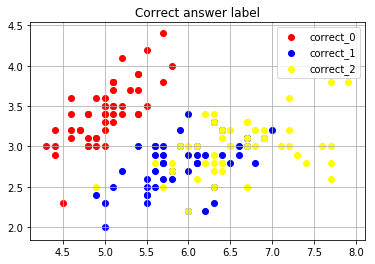

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Correct answer label')
# ax.scatter(x,y, c='red', label='group1')
ax.scatter(df_correct_answer_0["sepal length (cm)"], df_correct_answer_0["sepal width (cm)"], c='red', label='correct_0')
ax.scatter(df_correct_answer_1["sepal length (cm)"], df_correct_answer_1["sepal width (cm)"], c='blue', label='correct_1')
ax.scatter(df_correct_answer_2["sepal length (cm)"], df_correct_answer_2["sepal width (cm)"], c='yellow', label='correct_2')

ax.grid(True)
ax.legend(loc='upper right')

# テスト

# 上記で使われているアルゴリズムは正しく動いているかをテスト
<img src="images/test1.png">

## ユーグリット距離の計算は間違えていないか？
**scipy.spatial.distance.squareform(scipy.spatial.distance.pdist()** このモジュールを利用している

In [26]:
# ソースコードで上記計算を実行してみる
test_input = pd.DataFrame(data=([[1,2], [3,4], [5,6]]), columns=('A','B'))

In [27]:
test_input

,A,B
0,1,2
1,3,4
2,5,6


In [28]:
test_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(test_input, metric='euclidean'))

In [29]:
test_matrix
# 計算結果は間違ってはいないことがわかった。

array([[0.        , 2.82842712, 5.65685425],
       [2.82842712, 0.        , 2.82842712],
       [5.65685425, 2.82842712, 0.        ]])

## 最小値のk個を正しく選べているか？

In [30]:
# for文でソートした後、値0を除く3個を取得させます。

test_input = pd.DataFrame(data=([[1,4, 0], [5,8, 1], [9,12, 2], [1.5,3, 0], [5.5,7, 1], [9.5,11, 2], [0.5,2, 0], [6,6.5, 1], [10,11.5, 2]]), columns=('A','B', 'label'))
test_input.loc[:,['A','B']]  # labelカラムを除く
test_matrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(test_input, metric='euclidean'))
for i in range(3):
    label = 'distance_%s' % i
    test_input[label] = test_matrix[i]
    
label_dict = {}
for j in range(3):
    sort_label = 'distance_%s' % j
    label_dict[sort_label] = test_input.sort_values(by=sort_label)[1:4]['label']

In [31]:
test_input

,A,B,label,distance_0,distance_1,distance_2
0,1.0,4.0,0,0.000000,5.744563,11.489125
1,5.0,8.0,1,5.744563,0.000000,5.744563
2,9.0,12.0,2,11.489125,5.744563,0.000000
3,1.5,3.0,0,1.118034,6.184658,11.884864
4,5.5,7.0,1,5.500000,1.118034,6.184658
5,9.5,11.0,2,11.191515,5.500000,1.118034
6,0.5,2.0,0,2.061553,7.566373,13.275918
7,6.0,6.5,1,5.678908,1.802776,6.344289
8,10.0,11.5,2,11.884864,6.184658,1.118034


In [32]:
print("各列が値0を除く、最小3個を選択しているか確認\n(行、label名)\n")

print("distance_0列\n", label_dict['distance_0'])
print("\n distance_1列\n", label_dict['distance_1'])
print("\n distance_2列\n", label_dict['distance_2'])

各列が値0を除く、最小3個を選択しているか確認
(行、label名)

distance_0列
 3    0
6    0
4    1
Name: label, dtype: int64

 distance_1列
 4    1
7    1
5    2
Name: label, dtype: int64

 distance_2列
 5    2
8    2
1    1
Name: label, dtype: int64


## 選ばれたリストの中で多数決を正しく出来ているか？
**Counterモジュールを利用** 

In [33]:
count_result = {}
for v in range(3):
    predict_label = 'distance_%s' % v
#     count_result[v] = list(Counter(label_dict[predict_label]))[0]
    count_result[v] = Counter(label_dict[predict_label])

In [34]:
count_result  # 予測の行(distance_行番号)：{label名': 個数}  多い方が先頭にきており、index[0]を取得すると最多数が取得できる。



{0: Counter({0: 2, 1: 1}), 1: Counter({1: 2, 2: 1}), 2: Counter({2: 2, 1: 1})}

In [35]:
# もう一度 今度はlistで取得
count_result = {}
for v in range(3):
    predict_label = 'distance_%s' % v
    count_result[v] = list(Counter(label_dict[predict_label]))[0]

In [36]:
count_result

{0: 0, 1: 1, 2: 2}

**カウントをした結果が3つの中から多い個数を選択している。**  
**以上より、正しく多数決が出来ていることを示す。**

# 別のアルゴリズムを試す  TEST

In [37]:
test_input = pd.DataFrame(data=([[1,4, 0], [5,8, 1], [9,12, 2], [1.5,3, 0], [5.5,7, 1], [9.5,11, 2], [0.5,2, 0], [6,6.5, 1], [10,11.5, 2]]), columns=('A','B', 'label'))
test_input

,A,B,label
0,1.0,4.0,0
1,5.0,8.0,1
2,9.0,12.0,2
3,1.5,3.0,0
4,5.5,7.0,1
5,9.5,11.0,2
6,0.5,2.0,0
7,6.0,6.5,1
8,10.0,11.5,2


In [38]:
len(test_input)

9

In [39]:
# test_input['A'][9]

In [93]:
# # リストに3個の値入れて、新しい値が来た時にリスト内と比較しmax(list) > 新しい値　であれば入れ替える
# import numpy as np

# minimum_list = []
# row_result = {}
# distance_list = []
# for i in range(len(test_input)):
#     key_name = "row_%s" % i
#     for j in range(len(test_input)):
#         if j == i:
#             pass
#         else:    # 0 ~ 最後まで
#             # print("iとj: ", i, j)
#             if len(distance_list) > 2:  # リストに3個まで
#                 # print(print(distance_list))  # 最新の3個
#                 input_new_value = np.sqrt(np.power(test_input['A'][i]-test_input['A'][j], 2)+np.power(test_input['B'][i]-test_input['B'][j], 2))
#                 if max(distance_list) > input_new_value:  # 現在のリスト内の値より新しい値が近い値の場合
#                     distance_list.remove(max(distance_list))
#                     distance_list.append(input_new_value)
#                 else:  # 現在のリストが最小値のものだけの場合
#                     pass
#             else:
#                 distance_list.append(np.sqrt(np.power(test_input['A'][i]-test_input['A'][j], 2)+np.power(test_input['B'][i]-test_input['B'][j], 2)))
            
#     row_result[key_name] = distance_list     
#     distance_list = []
# row_result  # 最小値3個を集めたリスト    

In [101]:
# リストに3個の値入れて、新しい値が来た時にリスト内と比較しmax(list) > 新しい値　であれば入れ替える
import numpy as np

minimum_list = []
row_result = {}
distance_list = []
for i in range(len(test_input)):
    key_name = "row_%s" % i
    for j in range(len(test_input)):
#         if j == i:
#             pass
#         else:
            distance_list.append(np.sqrt(np.power(test_input['A'][i]-test_input['A'][j], 2)+np.power(test_input['B'][i]-test_input['B'][j], 2)))
            
    row_result[key_name] = distance_list     
    distance_list = []
# row_result  # 全ての距離を集めた結果

In [102]:
for key in row_result.keys():
    column_name = "distance_%s" % key
    test_input[column_name] = row_result[key]

In [103]:
test_input

,A,B,label,distance_row_0,distance_row_1,distance_row_2,distance_row_3,distance_row_4,distance_row_5,distance_row_6,distance_row_7,distance_row_8
0,1.0,4.0,0,0.000000,5.656854,11.313708,1.118034,5.408327,11.011358,2.061553,5.590170,11.715375
1,5.0,8.0,1,5.656854,0.000000,5.656854,6.103278,1.118034,5.408327,7.500000,1.802776,6.103278
2,9.0,12.0,2,11.313708,5.656854,0.000000,11.715375,6.103278,1.118034,13.124405,6.264982,1.118034
3,1.5,3.0,0,1.118034,6.103278,11.715375,0.000000,5.656854,11.313708,1.414214,5.700877,12.020815
4,5.5,7.0,1,5.408327,1.118034,6.103278,5.656854,0.000000,5.656854,7.071068,0.707107,6.363961
5,9.5,11.0,2,11.011358,5.408327,1.118034,11.313708,5.656854,0.000000,12.727922,5.700877,0.707107
6,0.5,2.0,0,2.061553,7.500000,13.124405,1.414214,7.071068,12.727922,0.000000,7.106335,13.435029
7,6.0,6.5,1,5.590170,1.802776,6.264982,5.700877,0.707107,5.700877,7.106335,0.000000,6.403124
8,10.0,11.5,2,11.715375,6.103278,1.118034,12.020815,6.363961,0.707107,13.435029,6.403124,0.000000
